In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Preprocessing 1 - Resize
rtDirectory = '/Users/ejbeazleigh/Downloads/ImageProcessing/WeedData'
train = []
labels = []
for weed in os.listdir(os.path.join(rtDirectory, 'train')):
    if weed == '.DS_Store':
        continue  # Skip the .DS_Store file
    print(weed)  # Checking directory is working
    for img in os.listdir(os.path.join(rtDirectory, 'train', weed)):
        train.append(cv2.imread(os.path.join(rtDirectory, 'train', weed, img)))
        labels.append(weed)
new_size = (236, 236)
# Preprocessing 2 - Hough Transform, resize, denoising and sharpening 
def preprocess_image(img):
    img = cv2.resize(img, new_size)
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply Hough Transform
    edges = cv2.Canny(gray, 50, 150)  # Perform edge detection
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)  # Apply Hough Transform
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw detected lines on the image
    return img
# Apply preprocessing to each image in the 'train' list
train_preprocessed = [preprocess_image(img) for img in train]

cleavers
charlock


In [4]:
######################### RGB feature extraction ##########################
RGBtrainvals = []
for img in train_preprocessed:
    rgb = np.mean(np.array(img), axis=(0, 1))
    RGBtrainvals.append(rgb)
# Convert lists to numpy arrays
X_train = np.array(RGBtrainvals)
y_train = np.array(labels)
# Check the dimension of X_train and y_train
print(X_train.shape, y_train.shape)



(480, 3) (480,)


In [6]:
import os
import cv2
import numpy as np
# Preprocessing and feature extraction for test data
test = []
testlabels = []
for weed in os.listdir(os.path.join(rtDirectory, 'test')):
    if weed == '.DS_Store':
        continue  # Skip the .DS_Store file
    print(weed)  # Checking directory is working
    for img in os.listdir(os.path.join(rtDirectory, 'test', weed)):
        test.append(cv2.imread(os.path.join(rtDirectory, 'test', weed, img)))
        testlabels.append(weed)
# Apply preprocessing to each image in the 'test' list
test_preprocessed = [preprocess_image(img) for img in test]
# Feature extraction for test data
RGBtestvals = []
for img in test:
    rgb = np.mean(np.array(img), axis=(0, 1))
    RGBtestvals.append(rgb)
# Convert lists to numpy arrays
X_test = np.array(RGBtestvals)
y_test = np.array(testlabels)
# Check the dimension of X_test and y_test
print(X_test.shape, y_test.shape)

##############################################################################################

# Preprocessing and feature extraction for validation data
val = []
vallabels = []
for weed in os.listdir(os.path.join(rtDirectory, 'val')):
    if weed == '.DS_Store':
        continue  # Skip the .DS_Store file
    print(weed)  # Checking directory is working
    for img in os.listdir(os.path.join(rtDirectory, 'val', weed)):
        test.append(cv2.imread(os.path.join(rtDirectory, 'val', weed, img)))
        testlabels.append(weed)
# Apply preprocessing to each image in the 'val' list
val_preprocessed = [preprocess_image(img) for img in val]
# Feature extraction for validation data
RGBvalvals = []
for img in val:
    rgb = np.mean(np.array(img), axis=(0, 1))
    RGBvalvals.append(rgb)
# Convert lists to numpy arrays
X_val = np.array(RGBvalvals)
y_val = np.array(vallabels)
# Check the dimension of X_val and y_val
print(X_val.shape, y_val.shape)


cleavers
charlock
(158, 3) (158,)
cleavers
charlock
(0,) (0,)


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=2, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best parameters from the hyperparameter tuning
best_params = grid_search.best_params_



Training Accuracy: 0.9041666666666667
Test Accuracy: 0.7215189873417721
F1-score: 0.7129371379532289
Precision: 0.7245991561181434
Recall: 0.7215189873417721


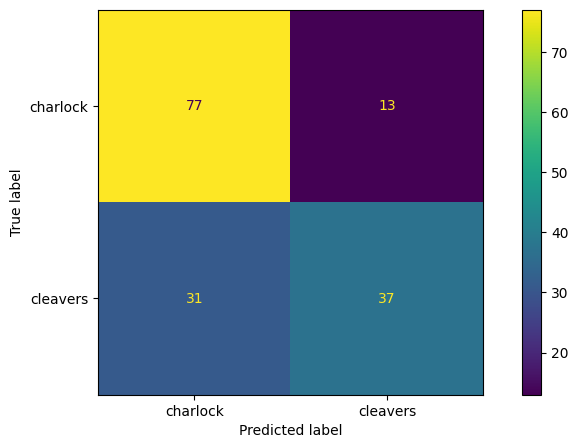

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Decision Tree classifier with the best hyperparameters from gridsearch
best_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
dt_classifier = DecisionTreeClassifier(**best_params)
# Fit the model to the training data
dt_classifier.fit(X_train, y_train)
# Model evaluation on training data
train_accuracy = dt_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)
# Predict the labels in the test dataset
y_test_predict = dt_classifier.predict(X_test)

# Overall Accuracy, F1-score, Precision, and Recall
test_accuracy = accuracy_score(y_test, y_test_predict)
print("Test Accuracy:", test_accuracy)
f1 = f1_score(y_test, y_test_predict, average='weighted')
print("F1-score:", f1)
precision = precision_score(y_test, y_test_predict, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, y_test_predict, average='weighted')
print("Recall:", recall)
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)
fig, ax = plt.subplots(figsize=(10, 5))
disp.plot(ax=ax)
plt.show()
